# Using XG Boost

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('diabetes.csv')
X = df[['Glucose', 'BloodPressure']]
y = df['Outcome']
X_sc = StandardScaler()
X = X_sc.fit_transform(X)
X = pd.DataFrame(data=X, columns=['Glucose', 'BloodPressure'])

## Train Test Split

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

***

## Performance Function

In [4]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
def print_score(clf, X_train, X_test, y_train, y_test, train = True):
#     print accuracy score, classification report, confusion metrics
    if train:
#         training performance
        print('Train Result : \n')
        print('Accuracy Score {0:.4f}\n'.format(accuracy_score(y_train, clf.predict(X_train))))
        print('Classification Report : \n {} \n'.format(classification_report(y_train, clf.predict(X_train))))
        print('Confusion Metrics : \n {} \n'.format(confusion_matrix(y_train, clf.predict(X_train))))
        
        res = cross_val_score(clf, X_train, y_train, cv = 10, scoring='accuracy')
        print('Average Accuracy : {0:.4f}\n'.format(np.mean(res)))
        print('Accuracy SD : {0:.4f}\n'.format(np.std(res)))
        
    elif train == False:
#         test performance
        print('Test Result : \n')
        print('Accuracy Score {0:.4f}\n'.format(accuracy_score(y_test, clf.predict(X_test))))
        print('Classification Report : \n {}\n'.format(classification_report(y_test, clf.predict(X_test))))
        print('Confusion Metrics : \n {} \n'.format(confusion_matrix(y_test, clf.predict(X_test))))
        

## Designing model

In [6]:
import xgboost as xgb

/home/jatin/anaconda3/envs/decision_tree/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
clf = xgb.XGBClassifier(max_depth=3, n_estimators=10000, learning_rate=0.3)

In [8]:
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.3, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=10000, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [9]:
print_score(clf, X_train, X_test, y_train, y_test, train = True)

Train Result : 

Accuracy Score 0.9560

Classification Report : 
              precision    recall  f1-score   support

          0       0.96      0.98      0.97       401
          1       0.95      0.92      0.94       213

avg / total       0.96      0.96      0.96       614
 

Confusion Metrics : 
 [[391  10]
 [ 17 196]] 

Average Accuracy : 0.6858

Accuracy SD : 0.0660



In [10]:
print_score(clf, X_train, X_test, y_train, y_test, train = False)

Test Result : 

Accuracy Score 0.6818

Classification Report : 
              precision    recall  f1-score   support

          0       0.77      0.73      0.75        99
          1       0.55      0.60      0.57        55

avg / total       0.69      0.68      0.68       154


Confusion Metrics : 
 [[72 27]
 [22 33]] 



In [18]:
from sklearn.metrics import roc_curve
y_scores = clf.predict(X_train)
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

In [19]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

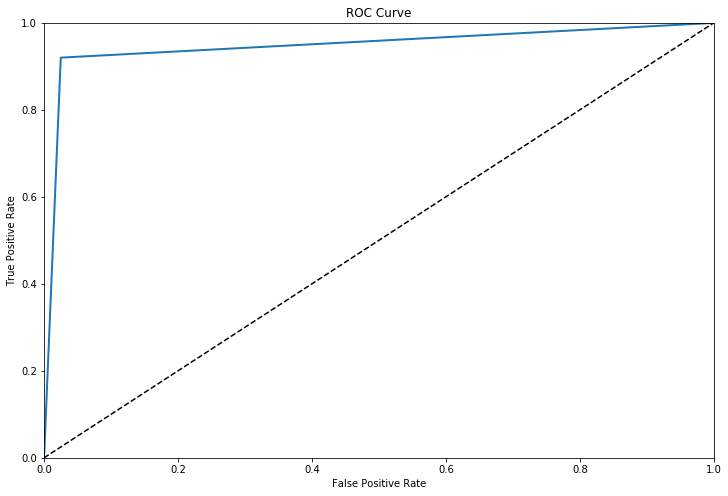

In [20]:
plt.figure(figsize=(12,8)); 
plot_roc_curve(fpr, tpr)
plt.show();